<Figure size 800x500 with 0 Axes>

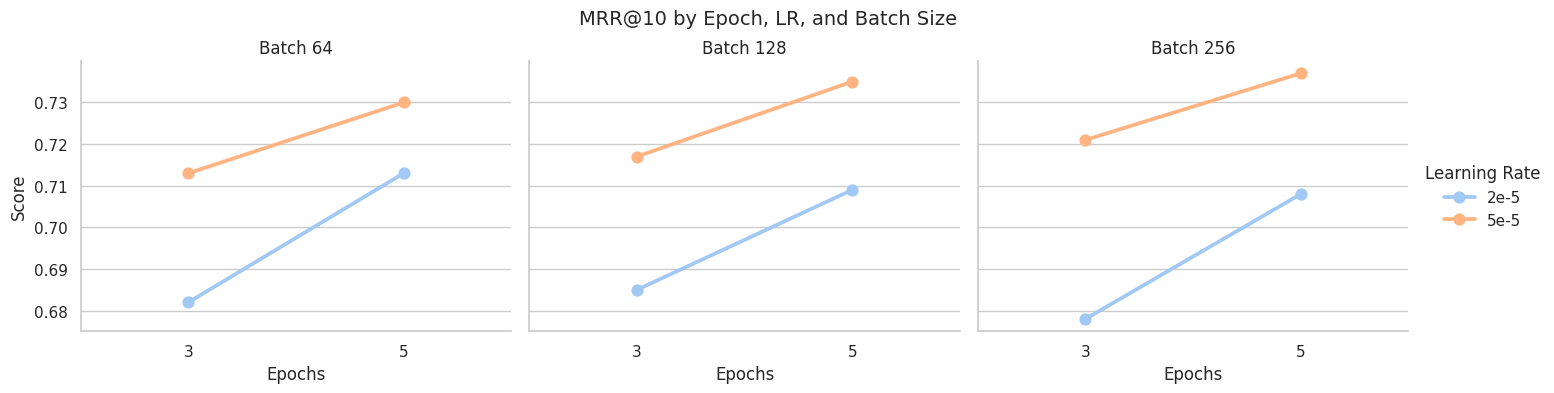

<Figure size 800x500 with 0 Axes>

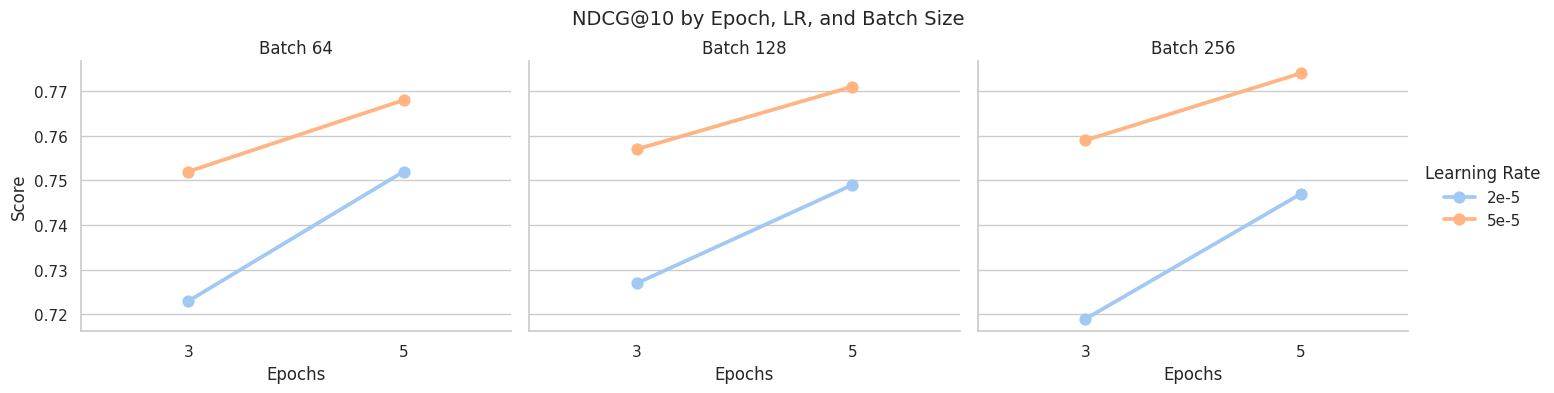

<Figure size 800x500 with 0 Axes>

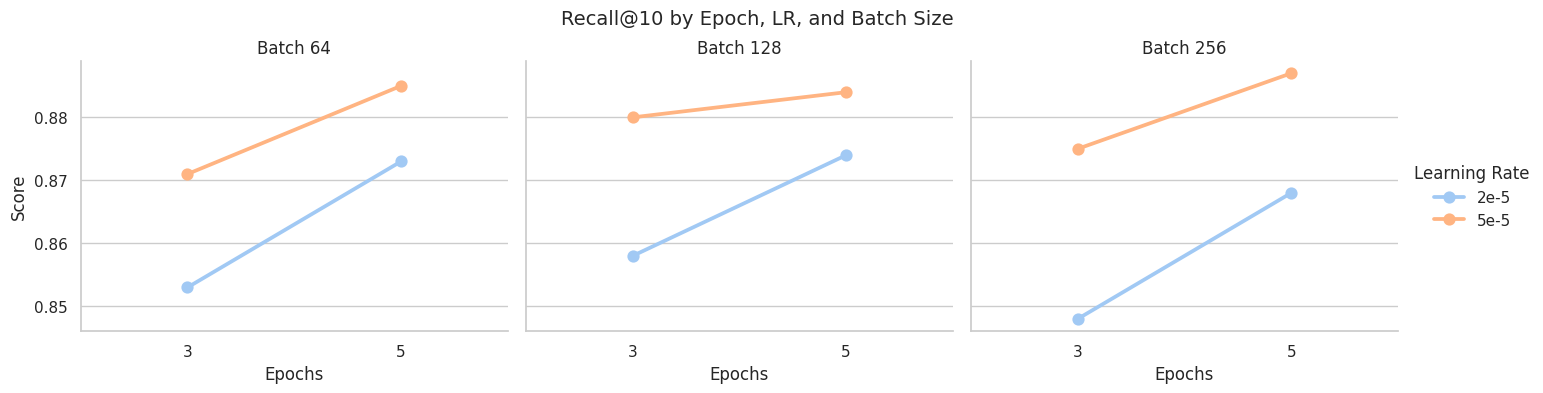

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Melt for plotting
df_melted = df.melt(
    id_vars=["Learning Rate", "Batch Size", "Epochs"],
    value_vars=["MRR@10", "NDCG@10", "Recall@10"],
    var_name="Metric",
    value_name="Score"
)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Plot: Point Plot for each metric
metrics = ["MRR@10", "NDCG@10", "Recall@10"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    metric_data = df_melted[df_melted["Metric"] == metric]
    ax = sns.catplot(
        data=metric_data,
        x="Epochs",
        y="Score",
        hue="Learning Rate",
        col="Batch Size",
        kind="point",
        height=4,
        aspect=1.2,
        palette="pastel"
    )
    ax.set_titles(col_template="Batch {col_name}")
    ax.set_axis_labels("Epochs", "Score")
    ax.fig.subplots_adjust(top=0.85)
    ax.fig.suptitle(f"{metric} by Epoch, LR, and Batch Size", fontsize=14)
    ax.savefig(f"pointplot_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()

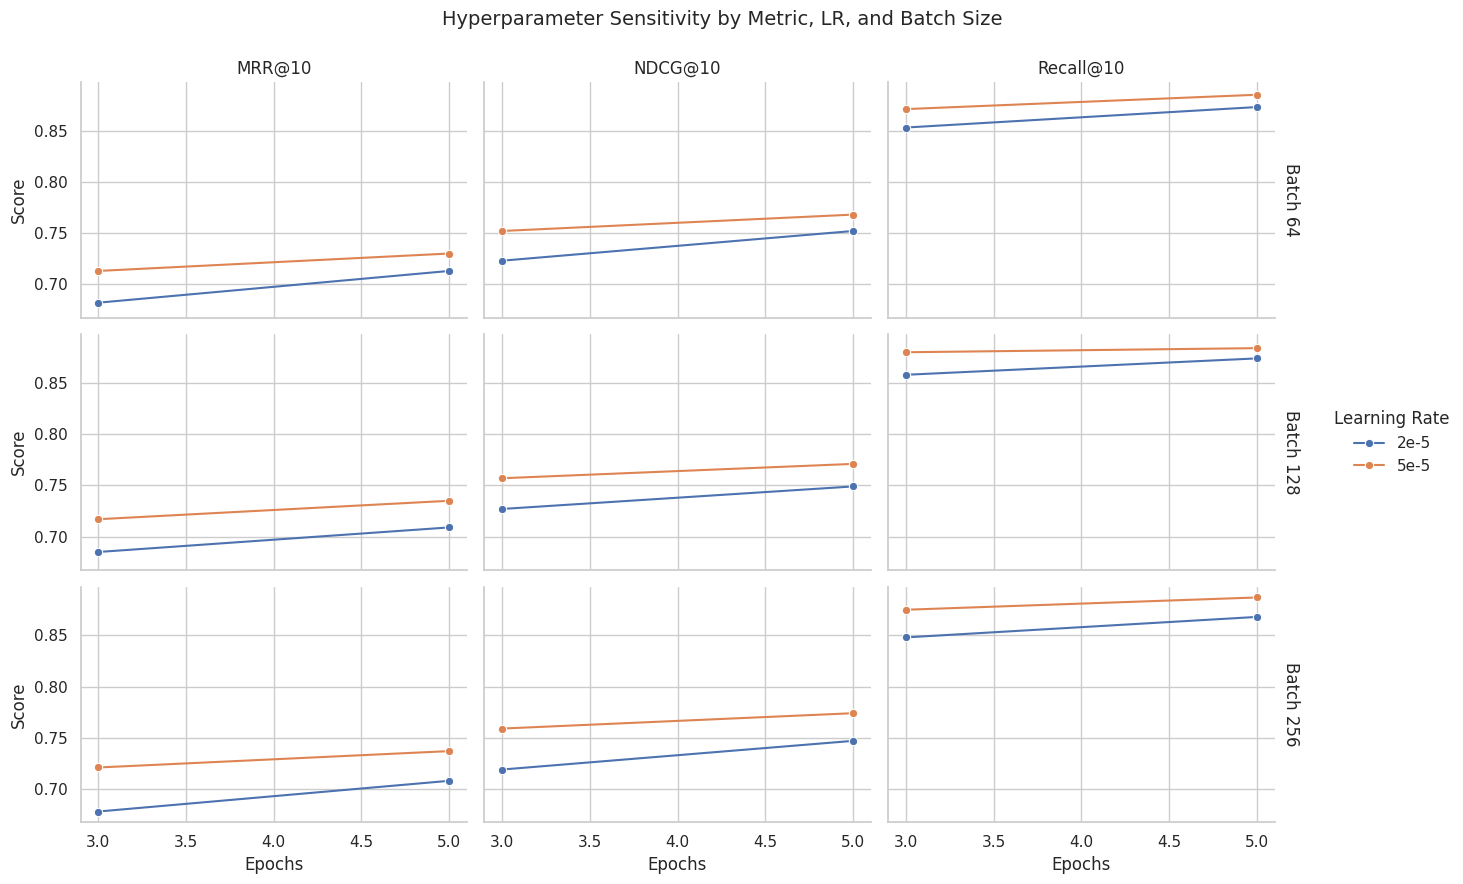

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Melt the data for plotting
df_melted = df.melt(
    id_vars=["Learning Rate", "Batch Size", "Epochs"],
    value_vars=["MRR@10", "NDCG@10", "Recall@10"],
    var_name="Metric",
    value_name="Score"
)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# 1. FacetGrid (Small Multiples)
g = sns.FacetGrid(
    df_melted,
    col="Metric",
    hue="Learning Rate",
    row="Batch Size",
    margin_titles=True,
    height=3,
    aspect=1.5
)
g.map(sns.lineplot, "Epochs", "Score", marker="o")
g.add_legend(title="Learning Rate")
g.set_titles(row_template='Batch {row_name}', col_template='{col_name}')
g.set_axis_labels("Epochs", "Score")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hyperparameter Sensitivity by Metric, LR, and Batch Size", fontsize=14)
plt.savefig("facetgrid_hyperparam_sensitivity.pdf", format="pdf", dpi=300)
plt.show()
plt.close()



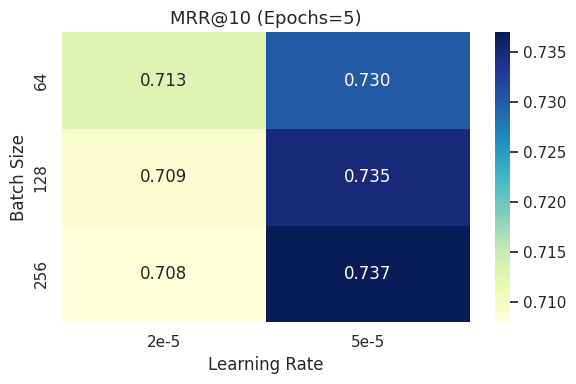

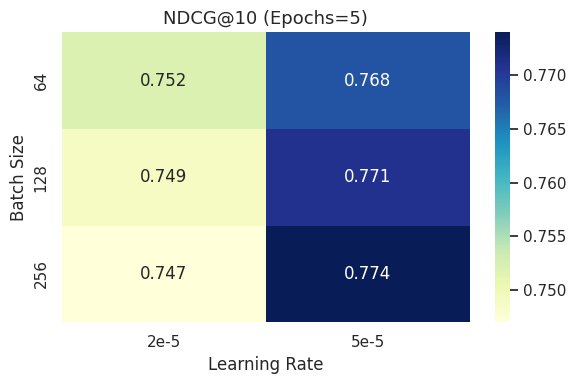

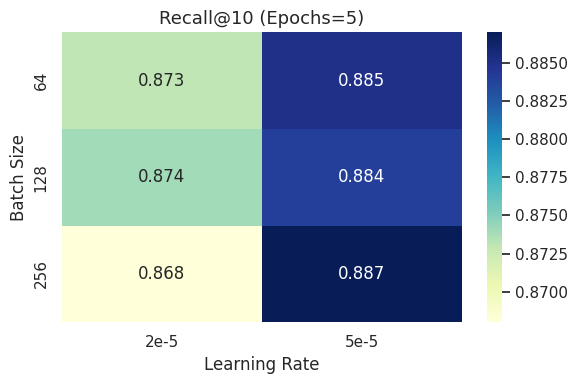

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Filter for Epochs = 5
df_5ep = df[df["Epochs"] == 5]


# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Heatmap plots for each metric
metrics = ["MRR@10", "NDCG@10", "Recall@10"]

for metric in metrics:
    pivot = df_5ep.pivot(index="Batch Size", columns="Learning Rate", values=metric)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
    plt.title(f"{metric} (Epochs=5)", fontsize=13)
    plt.xlabel("Learning Rate")
    plt.ylabel("Batch Size")
    plt.tight_layout()
    plt.savefig(f"heatmap_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()

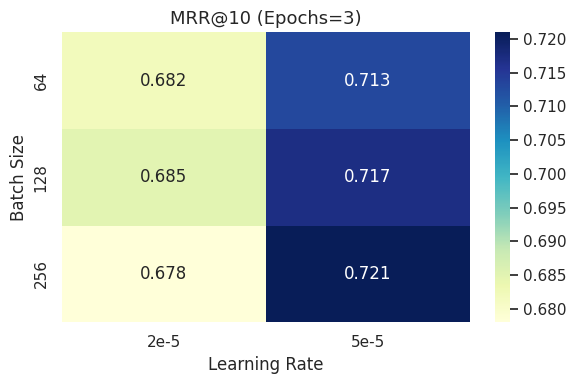

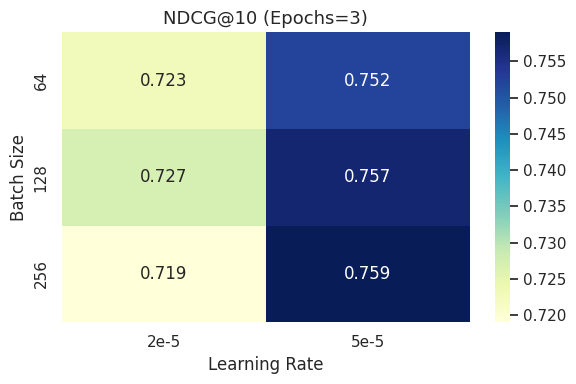

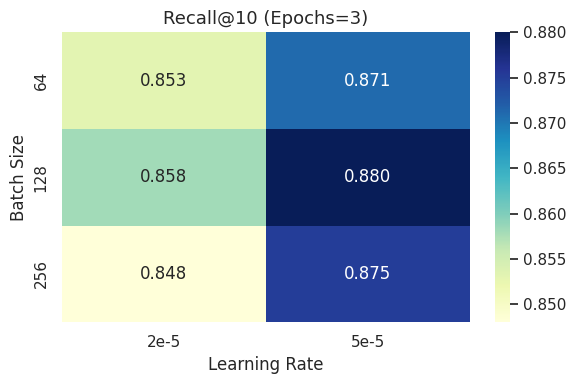

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])


# Filter for Epochs = 3
df_3ep = df[df["Epochs"] == 3]

# Heatmap plots for each metric
for metric in metrics:
    pivot = df_3ep.pivot(index="Batch Size", columns="Learning Rate", values=metric)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
    plt.title(f"{metric} (Epochs=3)", fontsize=13)
    plt.xlabel("Learning Rate")
    plt.ylabel("Batch Size")
    plt.tight_layout()
    plt.savefig(f"heatmap_epoch3_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()


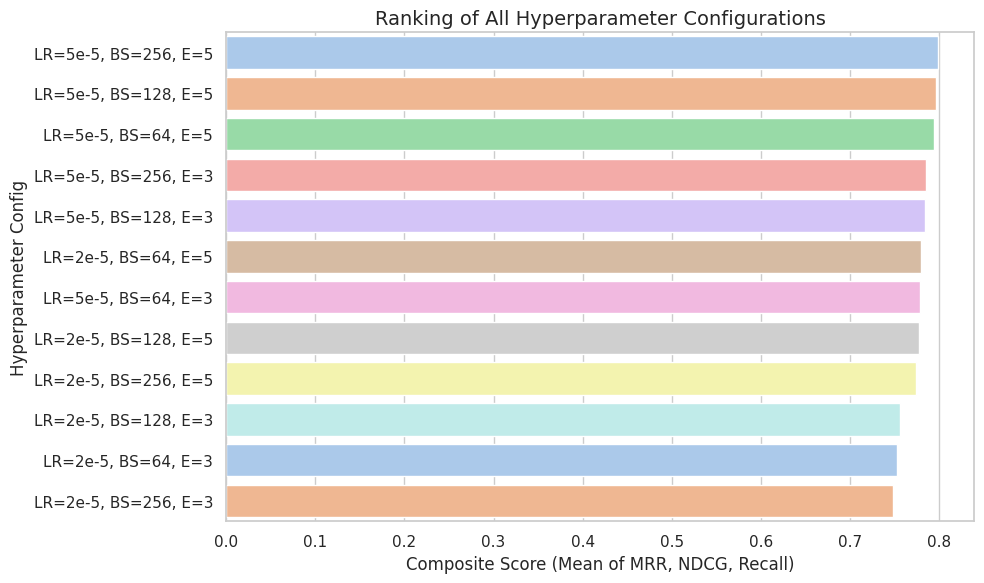

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Compute a composite score for ranking (you can adjust weights as needed)
df["Composite"] = df[["MRR@10", "NDCG@10", "Recall@10"]].mean(axis=1)

# Sort by composite score
df_sorted = df.sort_values("Composite", ascending=False)

# Build config label
df_sorted["Config"] = df_sorted.apply(lambda x: f"LR={x['Learning Rate']}, BS={x['Batch Size']}, E={x['Epochs']}", axis=1)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Bar plot of composite scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Composite", y="Config", data=df_sorted, palette="pastel")
plt.xlabel("Composite Score (Mean of MRR, NDCG, Recall)", fontsize=12)
plt.ylabel("Hyperparameter Config", fontsize=12)
plt.title("Ranking of All Hyperparameter Configurations", fontsize=14)
plt.tight_layout()
plt.savefig("config_ranking_composite.pdf", format="pdf", dpi=300)
plt.show()
plt.close()